In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import networkx as nx
import re
import matplotlib

In [ ]:
ALL_CV_FULL_KG = "..." #list of all CV graphs as pkl
ALL_JD_FULL_KG = "..." #list of all JD graphs as pkl

In [19]:
with open(ALL_CV_FULL_KG, 'rb') as file:
    G = pickle.load(file)
with open(ALL_JD_FULL_KG, 'rb') as file:
    G_JD = pickle.load(file)

In [28]:
import networkx as nx

def remove_missing_nodes(graph, nodes):
    return [node for node in nodes if graph.has_node(node)]


def rank_unpinned_nodes(graph, pinned_nodes, prefix_filter=None):
    # Remove missing nodes from pinned_nodes
    pinned_nodes = remove_missing_nodes(graph, pinned_nodes)
    print('Available pinned nodes:', pinned_nodes)

    # Create a subgraph containing pinned nodes, their neighbors, and 2-hop neighbors
    neighbors_of_pinned_nodes = set()
    for node in pinned_nodes:
        neighbors_of_pinned_nodes.update(graph.neighbors(node))

        # 2-hop neighbors
        neighbors_of_pinned_nodes.update(graph.neighbors(neighbor) for neighbor in graph.neighbors(node))

        # 3-hop neighbors
        neighbors_of_pinned_nodes.update(neighbor for neighbor in neighbors_of_pinned_nodes)

    subgraph = graph.subgraph(pinned_nodes + list(neighbors_of_pinned_nodes))


    # Calculate node ranks based on degree centrality
    node_ranks = nx.degree_centrality(subgraph)

    # Sort unpinned nodes by their rank in descending order
    unpinned_nodes = [node for node in graph.nodes() if node not in pinned_nodes and node_ranks.get(node) is not None]
    sorted_unpinned_nodes = sorted(unpinned_nodes, key=node_ranks.get, reverse=True)

    # Filter nodes based on prefix (e.g., "CV_" or "JD_")
    if prefix_filter is not None:
        sorted_unpinned_nodes = [node for node in sorted_unpinned_nodes if str(node).startswith(prefix_filter)]
        serial = [int(node.split("_")[1]) for node in sorted_unpinned_nodes]

    # Return the sorted unpinned nodes
    return sorted_unpinned_nodes, serial, subgraph



In [43]:
# Define pinned nodes (including one missing node)
pinned_nodes = list(JD_Graphs[171].nodes())

# Get ranked unpinned nodes starting with "CV_" or "JD_"
ranked_unpinned_nodes, job_no,subgraph = rank_unpinned_nodes(G_CV, pinned_nodes, prefix_filter="CV_")

# Print the result
print("Recommended JD No:", job_no)

Available pinned nodes: ['business administration', 'retail', 'sales', 'organizational skills', 'communication skills', 'interpersonal skills', 'customer service']
Recommended JD No: [61, 98, 12, 17, 19, 24, 26, 31, 60, 87, 88, 90, 93, 95, 106, 108, 111, 115, 126, 128, 129, 133, 139, 141, 175, 190, 193, 196, 11, 13, 14, 15, 22, 23, 25, 27, 36, 37, 38, 44, 45, 46, 50, 62, 63, 67, 80, 81, 82, 89, 92, 94, 96, 99, 102, 107, 110, 113, 114, 116, 118, 120, 122, 125, 127, 130, 131, 142, 146, 150, 151, 153, 157, 160, 161, 167, 169, 177, 194, 197, 198]


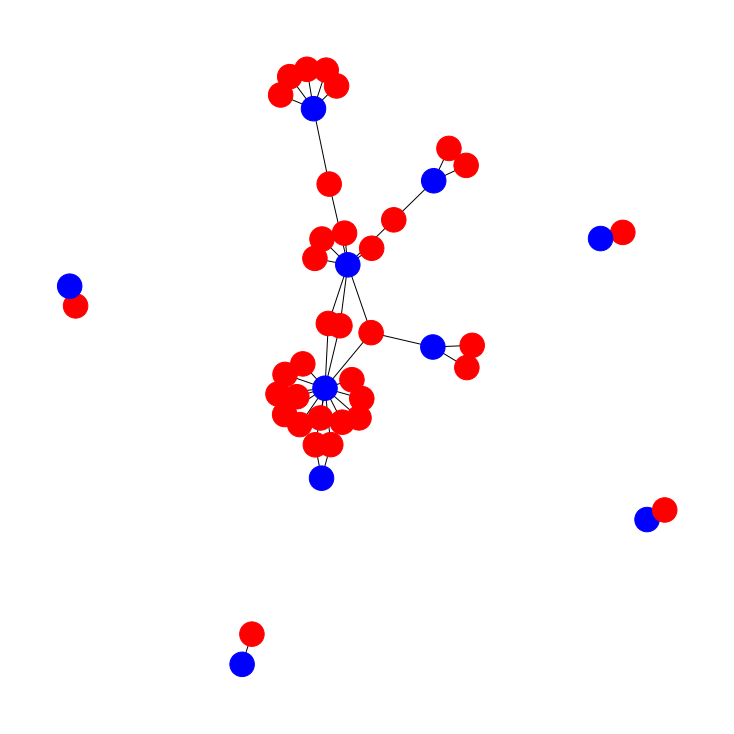

In [39]:
node_colors = []
for node in subgraph.nodes():
    if node.startswith("CV"):
        node_colors.append('green')
    elif node.startswith("JD"):
        node_colors.append('red')
    else:
        node_colors.append('blue')

# Draw the graph with specified node colors
posG_JD = nx.spring_layout(subgraph)
labelsG_JD = nx.get_edge_attributes(subgraph, 'label')
node_labelsG_JD = nx.get_node_attributes(subgraph, 'label')

plt.figure(figsize=(10, 10))
nx.draw(subgraph, posG_JD, with_labels=False, node_size=600,  node_color=node_colors)
# nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels,font_size=4,font_color='grey')
# nx.draw_networkx_labels(subgraph, pos, labels=node_labels, font_size=4, font_color='black', font_weight='bold')
plt.show()